In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()

In [18]:
test_period = pd.read_csv('dataset/test_period_weight.csv',index_col=0)
test_period

,cust_no,pur_amount_1_weight,pur_amount_period_3_weight
0,1,4.8,-3.45
1,2,-6.0,-6.50
2,3,0.3,0.15
3,4,3.0,1.50
4,5,-3.6,-2.40
...,...,...,...
19367,19138,0.0,0.05
19368,19208,0.0,1.50
19369,19244,0.0,0.10
19370,19283,0.0,1.75


In [21]:
pca_1 = pd.read_csv('dataset/pca_train.csv')
pca_1

,pca_tot_columns1,pca_tot_columns2,pca_A_columns1,pca_A_columns2,pca_B_columns1,pca_B_columns2,pca_C_columns1,pca_C_columns2
0,1.352223,-0.700886,4.678773,0.528203,-1.773943,0.142554,-1.040971,0.049068
1,1.009504,0.393808,5.539571,-1.120236,-1.928316,0.087687,-1.288658,0.027766
2,0.245420,-0.397918,-2.039936,-0.055409,-1.959386,0.083715,3.108841,-0.668311
3,-0.508635,0.589509,1.931222,-1.065540,-1.636641,0.075878,-0.853339,0.002387
4,0.152828,2.080249,4.338337,-3.375911,-1.962930,0.080759,-1.288658,0.027766
...,...,...,...,...,...,...,...,...
19333,-3.418198,-0.053363,-2.054827,-0.043774,-1.542395,0.006056,-1.288658,0.027766
19334,-3.597874,0.126314,-2.010484,0.006778,-1.959541,0.083360,-1.288658,0.027766
19335,-3.473483,0.001922,-1.803552,0.242689,-1.948142,0.074802,-1.288658,0.027766
19336,-2.962095,-0.509465,-1.966142,0.057330,-1.974808,0.089338,-1.288658,0.027766


In [23]:
mem1 = pd.read_csv('dataframe/train_set_1016.csv')[['cust_no','mem_1']]
mem1

,cust_no,mem_1
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
19333,19376,0.0
19334,19377,0.0
19335,19378,0.0
19336,19379,0.0


In [27]:
mem2 = pd.read_csv('dataframe/test_변수.csv')[['cust_no','mem_3']].fillna(0)
mem2

,cust_no,mem_3
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
19351,19283,0.0
19352,19350,0.0
19353,19381,1.0
19354,19382,0.0


In [10]:
pca = pd.read_csv('dataset/pca_all.csv')
test_item = pd.read_csv('dataset/test_item_weight.csv',index_col=0)
test_total = pd.read_csv('dataset/total_weight_13.csv')
test_item

,cust_no,가공식품,의약품,신선식품,일상용품,교육/문화용품,외식,패션잡화,의류,기타,전문스포츠/레저,가구/인테리어,가전,명품
0,1,-5.10,2.25,0.0,1.0,0.0,1.40,1.0,1.2,0.0,-1.0,-0.5,-3.0,1.5
1,2,-7.40,3.00,-12.5,0.0,0.0,-7.40,-5.8,11.0,0.0,-11.3,-3.1,0.0,3.3
2,3,-1.40,0.00,0.0,0.0,0.0,0.00,0.0,-0.6,0.0,0.0,0.0,0.0,0.0
3,4,-0.95,-2.40,0.0,0.2,0.0,1.35,-4.2,-4.5,0.0,-0.1,0.4,0.0,0.0
4,5,-0.50,0.20,-4.2,-2.4,0.0,-6.80,-1.8,0.0,0.0,0.1,0.0,-1.5,-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,19283,3.50,0.00,0.1,4.5,0.0,1.60,2.4,0.3,0.0,0.0,0.0,0.0,0.0
19368,19350,0.80,2.00,0.0,3.5,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19369,19381,2.50,0.60,3.5,0.9,0.1,0.60,0.8,1.2,0.0,0.3,1.5,0.0,0.0
19370,19382,2.00,3.50,2.5,0.4,0.6,2.00,0.3,0.3,0.0,1.2,0.1,0.0,0.0


In [11]:
test_total

,cust_no,total_weight,total_weight_A,total_weight_B,total_weight_C
0,1,0.50,0.50,-0.6,0.0
1,2,1.20,1.20,1.1,0.0
2,3,-0.15,-0.20,0.0,-0.9
3,4,-3.75,-4.50,0.3,-1.5
4,5,-1.35,-1.15,-0.1,0.0
...,...,...,...,...,...
19367,19283,3.00,3.00,0.0,0.0
19368,19350,0.80,0.00,0.2,0.1
19369,19381,1.60,0.80,3.0,0.0
19370,19382,0.80,0.60,2.5,0.0


In [12]:
pca

,pca_tot_columns1,pca_tot_columns2,pca_A_columns1,pca_A_columns2,pca_B_columns1,pca_B_columns2,pca_C_columns1,pca_C_columns2
0,1.578028,0.183411,5.630433,-0.411896,-2.332196,-0.057617,-1.305409,-0.099575
1,1.034267,-0.390320,5.508923,-1.688277,-2.417714,-0.040755,-1.602269,-0.002229
2,-0.326113,-0.735083,-2.600980,-0.073098,-2.476551,0.023098,3.945350,0.322726
3,-0.590368,-0.183107,1.915308,-0.166358,-2.044154,-0.066090,-1.135172,-0.101180
4,-0.666202,-1.933544,2.961319,-2.890206,-2.492249,0.022624,-1.602269,-0.002229
...,...,...,...,...,...,...,...,...
19367,-2.779991,-1.245321,-1.081673,0.000593,-1.739785,1.003293,-1.095295,0.652834
19368,-2.422466,-0.742144,-1.799326,-0.971154,-1.650063,0.906742,-1.081073,0.637401
19369,-1.696900,0.279009,-1.768974,-0.936020,1.034381,-1.931060,-1.095295,0.652834
19370,-1.791539,0.145815,-1.742747,-0.897525,0.834063,-1.720703,-1.095295,0.652834


In [32]:
total = pd.merge(test_total, test_item, on='cust_no',how='outer')
total

,cust_no,total_weight,total_weight_A,total_weight_B,total_weight_C,가공식품,의약품,신선식품,일상용품,교육/문화용품,외식,패션잡화,의류,기타,전문스포츠/레저,가구/인테리어,가전,명품
0,1,0.50,0.50,-0.6,0.0,-5.10,2.25,0.0,1.0,0.0,1.40,1.0,1.2,0.0,-1.0,-0.5,-3.0,1.5
1,2,1.20,1.20,1.1,0.0,-7.40,3.00,-12.5,0.0,0.0,-7.40,-5.8,11.0,0.0,-11.3,-3.1,0.0,3.3
2,3,-0.15,-0.20,0.0,-0.9,-1.40,0.00,0.0,0.0,0.0,0.00,0.0,-0.6,0.0,0.0,0.0,0.0,0.0
3,4,-3.75,-4.50,0.3,-1.5,-0.95,-2.40,0.0,0.2,0.0,1.35,-4.2,-4.5,0.0,-0.1,0.4,0.0,0.0
4,5,-1.35,-1.15,-0.1,0.0,-0.50,0.20,-4.2,-2.4,0.0,-6.80,-1.8,0.0,0.0,0.1,0.0,-1.5,-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,19283,3.00,3.00,0.0,0.0,3.50,0.00,0.1,4.5,0.0,1.60,2.4,0.3,0.0,0.0,0.0,0.0,0.0
19368,19350,0.80,0.00,0.2,0.1,0.80,2.00,0.0,3.5,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19369,19381,1.60,0.80,3.0,0.0,2.50,0.60,3.5,0.9,0.1,0.60,0.8,1.2,0.0,0.3,1.5,0.0,0.0
19370,19382,0.80,0.60,2.5,0.0,2.00,3.50,2.5,0.4,0.6,2.00,0.3,0.3,0.0,1.2,0.1,0.0,0.0


In [33]:
total = pd.concat([total, pca],axis=1)
total

,cust_no,total_weight,total_weight_A,total_weight_B,total_weight_C,가공식품,의약품,신선식품,일상용품,교육/문화용품,...,가전,명품,pca_tot_columns1,pca_tot_columns2,pca_A_columns1,pca_A_columns2,pca_B_columns1,pca_B_columns2,pca_C_columns1,pca_C_columns2
0,1,0.50,0.50,-0.6,0.0,-5.10,2.25,0.0,1.0,0.0,...,-3.0,1.5,1.578028,0.183411,5.630433,-0.411896,-2.332196,-0.057617,-1.305409,-0.099575
1,2,1.20,1.20,1.1,0.0,-7.40,3.00,-12.5,0.0,0.0,...,0.0,3.3,1.034267,-0.390320,5.508923,-1.688277,-2.417714,-0.040755,-1.602269,-0.002229
2,3,-0.15,-0.20,0.0,-0.9,-1.40,0.00,0.0,0.0,0.0,...,0.0,0.0,-0.326113,-0.735083,-2.600980,-0.073098,-2.476551,0.023098,3.945350,0.322726
3,4,-3.75,-4.50,0.3,-1.5,-0.95,-2.40,0.0,0.2,0.0,...,0.0,0.0,-0.590368,-0.183107,1.915308,-0.166358,-2.044154,-0.066090,-1.135172,-0.101180
4,5,-1.35,-1.15,-0.1,0.0,-0.50,0.20,-4.2,-2.4,0.0,...,-1.5,-0.2,-0.666202,-1.933544,2.961319,-2.890206,-2.492249,0.022624,-1.602269,-0.002229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,19283,3.00,3.00,0.0,0.0,3.50,0.00,0.1,4.5,0.0,...,0.0,0.0,-2.779991,-1.245321,-1.081673,0.000593,-1.739785,1.003293,-1.095295,0.652834
19368,19350,0.80,0.00,0.2,0.1,0.80,2.00,0.0,3.5,0.0,...,0.0,0.0,-2.422466,-0.742144,-1.799326,-0.971154,-1.650063,0.906742,-1.081073,0.637401
19369,19381,1.60,0.80,3.0,0.0,2.50,0.60,3.5,0.9,0.1,...,0.0,0.0,-1.696900,0.279009,-1.768974,-0.936020,1.034381,-1.931060,-1.095295,0.652834
19370,19382,0.80,0.60,2.5,0.0,2.00,3.50,2.5,0.4,0.6,...,0.0,0.0,-1.791539,0.145815,-1.742747,-0.897525,0.834063,-1.720703,-1.095295,0.652834


In [34]:
total = pd.merge(total, test_period, on='cust_no',how='outer')
total

,cust_no,total_weight,total_weight_A,total_weight_B,total_weight_C,가공식품,의약품,신선식품,일상용품,교육/문화용품,...,pca_tot_columns1,pca_tot_columns2,pca_A_columns1,pca_A_columns2,pca_B_columns1,pca_B_columns2,pca_C_columns1,pca_C_columns2,pur_amount_1_weight,pur_amount_period_3_weight
0,1,0.50,0.50,-0.6,0.0,-5.10,2.25,0.0,1.0,0.0,...,1.578028,0.183411,5.630433,-0.411896,-2.332196,-0.057617,-1.305409,-0.099575,4.8,-3.45
1,2,1.20,1.20,1.1,0.0,-7.40,3.00,-12.5,0.0,0.0,...,1.034267,-0.390320,5.508923,-1.688277,-2.417714,-0.040755,-1.602269,-0.002229,-6.0,-6.50
2,3,-0.15,-0.20,0.0,-0.9,-1.40,0.00,0.0,0.0,0.0,...,-0.326113,-0.735083,-2.600980,-0.073098,-2.476551,0.023098,3.945350,0.322726,0.3,0.15
3,4,-3.75,-4.50,0.3,-1.5,-0.95,-2.40,0.0,0.2,0.0,...,-0.590368,-0.183107,1.915308,-0.166358,-2.044154,-0.066090,-1.135172,-0.101180,3.0,1.50
4,5,-1.35,-1.15,-0.1,0.0,-0.50,0.20,-4.2,-2.4,0.0,...,-0.666202,-1.933544,2.961319,-2.890206,-2.492249,0.022624,-1.602269,-0.002229,-3.6,-2.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,19283,3.00,3.00,0.0,0.0,3.50,0.00,0.1,4.5,0.0,...,-2.779991,-1.245321,-1.081673,0.000593,-1.739785,1.003293,-1.095295,0.652834,0.0,1.75
19368,19350,0.80,0.00,0.2,0.1,0.80,2.00,0.0,3.5,0.0,...,-2.422466,-0.742144,-1.799326,-0.971154,-1.650063,0.906742,-1.081073,0.637401,0.0,0.75
19369,19381,1.60,0.80,3.0,0.0,2.50,0.60,3.5,0.9,0.1,...,-1.696900,0.279009,-1.768974,-0.936020,1.034381,-1.931060,-1.095295,0.652834,0.0,1.50
19370,19382,0.80,0.60,2.5,0.0,2.00,3.50,2.5,0.4,0.6,...,-1.791539,0.145815,-1.742747,-0.897525,0.834063,-1.720703,-1.095295,0.652834,0.0,0.70


In [35]:
total = pd.merge(total, mem1, on='cust_no',how='left')
total = pd.merge(total, mem2, on='cust_no',how='left')
total

,cust_no,total_weight,total_weight_A,total_weight_B,total_weight_C,가공식품,의약품,신선식품,일상용품,교육/문화용품,...,pca_A_columns1,pca_A_columns2,pca_B_columns1,pca_B_columns2,pca_C_columns1,pca_C_columns2,pur_amount_1_weight,pur_amount_period_3_weight,mem_1,mem_3
0,1,0.50,0.50,-0.6,0.0,-5.10,2.25,0.0,1.0,0.0,...,5.630433,-0.411896,-2.332196,-0.057617,-1.305409,-0.099575,4.8,-3.45,0.0,0.0
1,2,1.20,1.20,1.1,0.0,-7.40,3.00,-12.5,0.0,0.0,...,5.508923,-1.688277,-2.417714,-0.040755,-1.602269,-0.002229,-6.0,-6.50,0.0,0.0
2,3,-0.15,-0.20,0.0,-0.9,-1.40,0.00,0.0,0.0,0.0,...,-2.600980,-0.073098,-2.476551,0.023098,3.945350,0.322726,0.3,0.15,0.0,0.0
3,4,-3.75,-4.50,0.3,-1.5,-0.95,-2.40,0.0,0.2,0.0,...,1.915308,-0.166358,-2.044154,-0.066090,-1.135172,-0.101180,3.0,1.50,0.0,0.0
4,5,-1.35,-1.15,-0.1,0.0,-0.50,0.20,-4.2,-2.4,0.0,...,2.961319,-2.890206,-2.492249,0.022624,-1.602269,-0.002229,-3.6,-2.40,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,19283,3.00,3.00,0.0,0.0,3.50,0.00,0.1,4.5,0.0,...,-1.081673,0.000593,-1.739785,1.003293,-1.095295,0.652834,0.0,1.75,NaN,0.0
19368,19350,0.80,0.00,0.2,0.1,0.80,2.00,0.0,3.5,0.0,...,-1.799326,-0.971154,-1.650063,0.906742,-1.081073,0.637401,0.0,0.75,NaN,0.0
19369,19381,1.60,0.80,3.0,0.0,2.50,0.60,3.5,0.9,0.1,...,-1.768974,-0.936020,1.034381,-1.931060,-1.095295,0.652834,0.0,1.50,NaN,1.0
19370,19382,0.80,0.60,2.5,0.0,2.00,3.50,2.5,0.4,0.6,...,-1.742747,-0.897525,0.834063,-1.720703,-1.095295,0.652834,0.0,0.70,NaN,0.0


In [29]:
tot = pd.read_csv('dataset/mean_test.csv')
tot

,cust_no,내구재_ratio_ch,비내구재_ratio_ch,주말_ratio_ch,일상용품,가공식품,신선식품,의류,label
0,1,0.033863,-0.049991,0.081778,0.119842,0.064814,0.042769,0.414949,1
1,2,0.022889,-0.051394,0.004486,0.351120,0.048396,0.099708,0.256865,0
2,3,0.000000,0.014869,-0.001164,0.085220,0.649206,0.229122,0.021122,1
3,4,-0.000516,0.050224,-0.019855,0.125073,0.131935,0.108381,0.383719,1
4,5,-0.009789,0.043374,0.031285,0.177452,0.425188,0.121839,0.107001,1
...,...,...,...,...,...,...,...,...,...
19367,19212,0.000000,-0.500000,0.000000,0.000000,0.447027,0.052973,0.000000,1
19368,19221,0.000000,-0.500000,-0.500000,0.000000,0.500000,0.000000,0.000000,0
19369,19229,0.000000,-0.477350,0.000000,0.022650,0.280198,0.197152,0.000000,1
19370,19240,0.000000,0.000000,-0.500000,0.000000,0.000000,0.000000,0.000000,1


In [36]:
total = pd.merge(total, tot, on='cust_no',how='outer',suffixes=['','_ratio'])
total

,cust_no,total_weight,total_weight_A,total_weight_B,total_weight_C,가공식품,의약품,신선식품,일상용품,교육/문화용품,...,mem_1,mem_3,내구재_ratio_ch,비내구재_ratio_ch,주말_ratio_ch,일상용품_ratio,가공식품_ratio,신선식품_ratio,의류_ratio,label
0,1,0.50,0.50,-0.6,0.0,-5.10,2.25,0.0,1.0,0.0,...,0.0,0.0,0.033863,-0.049991,0.081778,0.119842,0.064814,0.042769,0.414949,1
1,2,1.20,1.20,1.1,0.0,-7.40,3.00,-12.5,0.0,0.0,...,0.0,0.0,0.022889,-0.051394,0.004486,0.351120,0.048396,0.099708,0.256865,0
2,3,-0.15,-0.20,0.0,-0.9,-1.40,0.00,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.014869,-0.001164,0.085220,0.649206,0.229122,0.021122,1
3,4,-3.75,-4.50,0.3,-1.5,-0.95,-2.40,0.0,0.2,0.0,...,0.0,0.0,-0.000516,0.050224,-0.019855,0.125073,0.131935,0.108381,0.383719,1
4,5,-1.35,-1.15,-0.1,0.0,-0.50,0.20,-4.2,-2.4,0.0,...,0.0,0.0,-0.009789,0.043374,0.031285,0.177452,0.425188,0.121839,0.107001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,19283,3.00,3.00,0.0,0.0,3.50,0.00,0.1,4.5,0.0,...,NaN,0.0,0.000000,0.136369,0.201923,0.304962,0.134699,0.001670,0.005058,0
19368,19350,0.80,0.00,0.2,0.1,0.80,2.00,0.0,3.5,0.0,...,NaN,0.0,0.000000,0.112116,0.081395,0.387884,0.105054,0.000000,0.000000,0
19369,19381,1.60,0.80,3.0,0.0,2.50,0.60,3.5,0.9,0.1,...,NaN,1.0,0.013943,0.362465,0.122581,0.030713,0.143828,0.217367,0.076828,0
19370,19382,0.80,0.60,2.5,0.0,2.00,3.50,2.5,0.4,0.6,...,NaN,0.0,0.001232,0.386089,0.116438,0.031907,0.212510,0.158613,0.019406,0


In [38]:
total.fillna(0,inplace=True)
for i in [1,3]:
    total[f'mem_{i}'] = total[f'mem_{i}'].replace({0:-1})
    
total

,cust_no,total_weight,total_weight_A,total_weight_B,total_weight_C,가공식품,의약품,신선식품,일상용품,교육/문화용품,...,mem_1,mem_3,내구재_ratio_ch,비내구재_ratio_ch,주말_ratio_ch,일상용품_ratio,가공식품_ratio,신선식품_ratio,의류_ratio,label
0,1,0.50,0.50,-0.6,0.0,-5.10,2.25,0.0,1.0,0.0,...,-1.0,-1.0,0.033863,-0.049991,0.081778,0.119842,0.064814,0.042769,0.414949,1
1,2,1.20,1.20,1.1,0.0,-7.40,3.00,-12.5,0.0,0.0,...,-1.0,-1.0,0.022889,-0.051394,0.004486,0.351120,0.048396,0.099708,0.256865,0
2,3,-0.15,-0.20,0.0,-0.9,-1.40,0.00,0.0,0.0,0.0,...,-1.0,-1.0,0.000000,0.014869,-0.001164,0.085220,0.649206,0.229122,0.021122,1
3,4,-3.75,-4.50,0.3,-1.5,-0.95,-2.40,0.0,0.2,0.0,...,-1.0,-1.0,-0.000516,0.050224,-0.019855,0.125073,0.131935,0.108381,0.383719,1
4,5,-1.35,-1.15,-0.1,0.0,-0.50,0.20,-4.2,-2.4,0.0,...,-1.0,-1.0,-0.009789,0.043374,0.031285,0.177452,0.425188,0.121839,0.107001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,19283,3.00,3.00,0.0,0.0,3.50,0.00,0.1,4.5,0.0,...,-1.0,-1.0,0.000000,0.136369,0.201923,0.304962,0.134699,0.001670,0.005058,0
19368,19350,0.80,0.00,0.2,0.1,0.80,2.00,0.0,3.5,0.0,...,-1.0,-1.0,0.000000,0.112116,0.081395,0.387884,0.105054,0.000000,0.000000,0
19369,19381,1.60,0.80,3.0,0.0,2.50,0.60,3.5,0.9,0.1,...,-1.0,1.0,0.013943,0.362465,0.122581,0.030713,0.143828,0.217367,0.076828,0
19370,19382,0.80,0.60,2.5,0.0,2.00,3.50,2.5,0.4,0.6,...,-1.0,-1.0,0.001232,0.386089,0.116438,0.031907,0.212510,0.158613,0.019406,0


In [74]:
total.to_csv('dataset/test_최종변수.csv',index=False)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

In [62]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(total.drop(['cust_no','label'],axis=1).fillna(0),total['label']
                                                        ,test_size=0.2, random_state=1930)

In [63]:

lg = LGBMClassifier(n_estimators = 500, learning_rate=0.1, n_jobs=-1)
lg.fit(X_train1, y_train1)
preds2= lg.predict(X_test1)

print (accuracy_score(y_test1, preds2))

0.7411612903225806


<AxesSubplot:title={'center':'LightGBM Feature_importances'}>

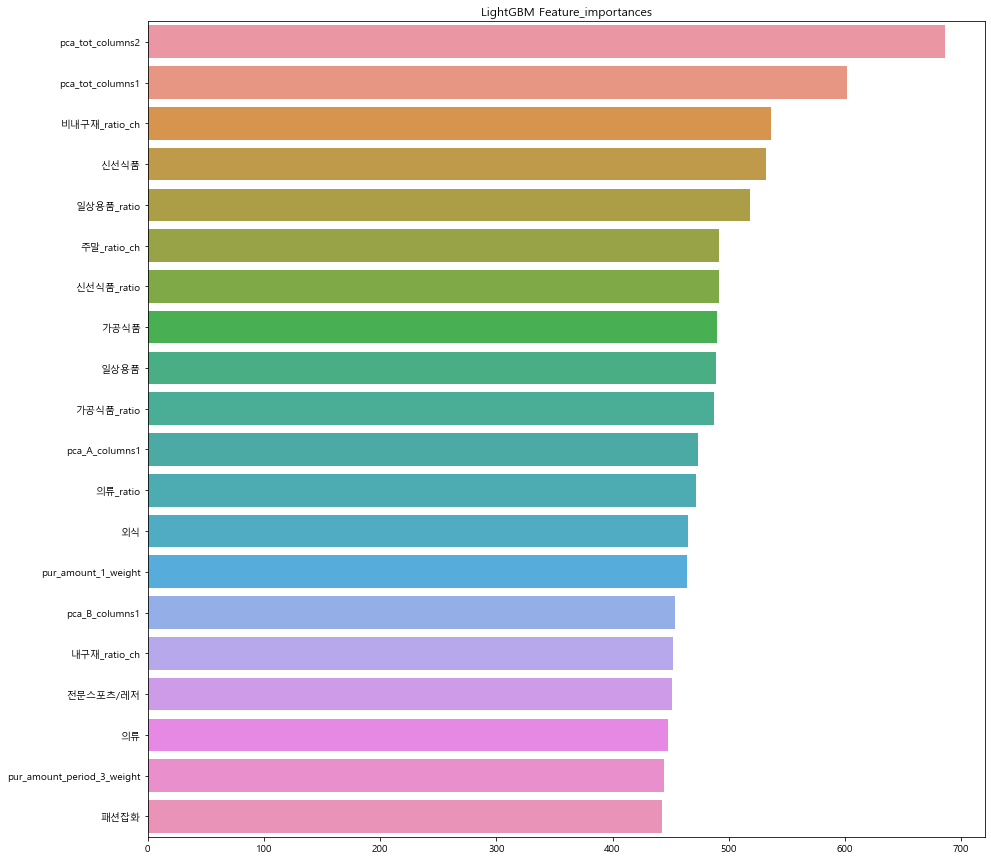

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

li = []
for i in zip(lg.feature_importances_, X_train1.columns):
    li.append(i)
    
li = sorted(li,reverse=True)

fi = [x[0] for x in li]
na = [x[1] for x in li]

plt.figure(figsize=(15,15))
plt.rc('font',family='Malgun Gothic')
plt.title('LightGBM Feature_importances')
sns.barplot(x=fi[:20],y=na[:20])

In [65]:
xg = XGBClassifier(n_estimators = 500, learning_rate=0.1, n_jobs=-1)
xg.fit(X_train1, y_train1)
preds1 = xg.predict(X_test1)

print (accuracy_score(y_test1, preds1))

C:\Users\han71\anaconda3\envs\cakd3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:19:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7313548387096774


<AxesSubplot:title={'center':'XGBboost Feature_importances'}>

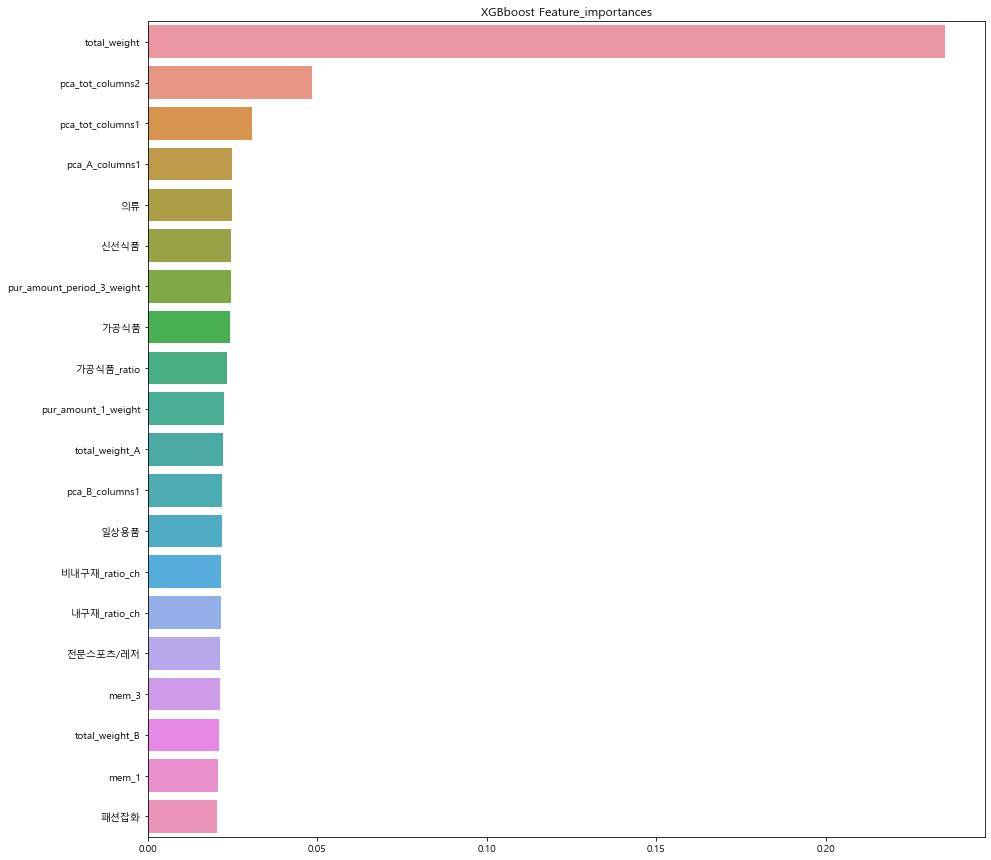

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

li1 = []
for i in zip(xg.feature_importances_, X_train1.columns):
    li1.append(i)
    
li1 = sorted(li1,reverse=True)

fi1 = [x[0] for x in li1]
na1 = [x[1] for x in li1]

plt.figure(figsize=(15,15))
plt.rc('font',family='Malgun Gothic')
plt.title('XGBboost Feature_importances')
sns.barplot(x=fi1[:20],y=na1[:20])

In [67]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train1,y_train1)
preds1=rf.predict(X_test1)

acc1 = accuracy_score(y_test1, preds1)
print (acc1)

0.7465806451612903


<AxesSubplot:title={'center':'RandomForest Feature_importances'}>

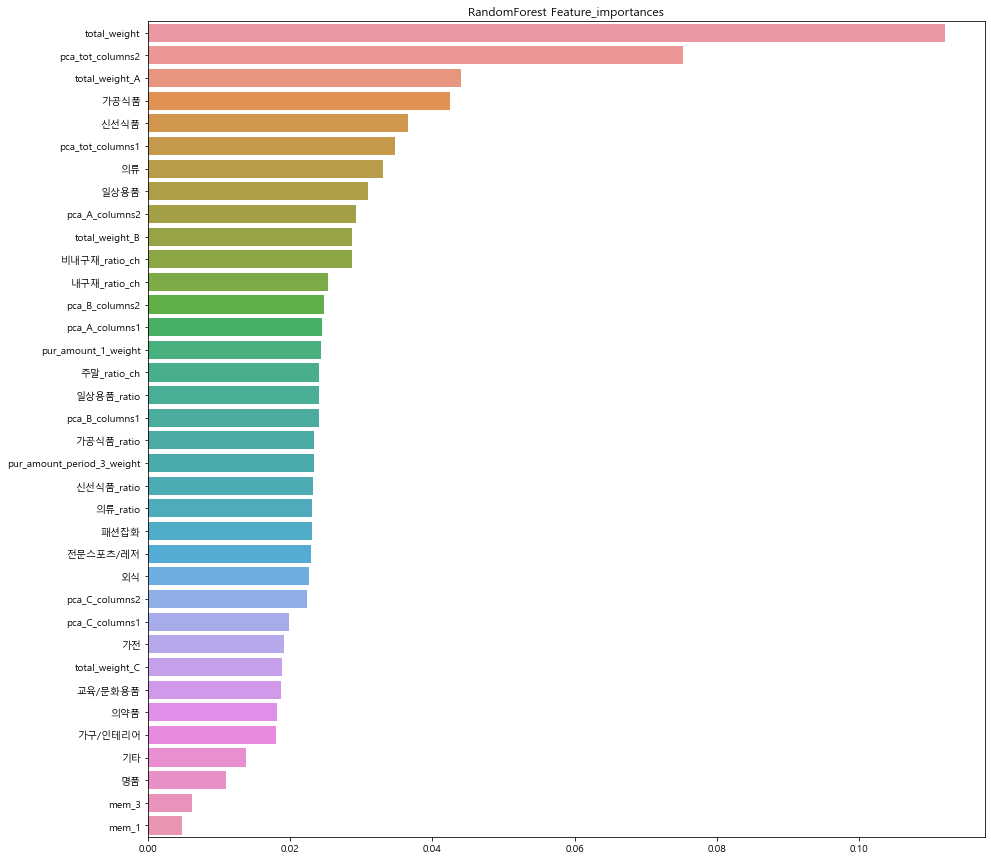

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

li2 = []
for i in zip(rf.feature_importances_, X_train1.columns):
    li2.append(i)
    
li2 = sorted(li2,reverse=True)

fi2 = [x[0] for x in li2]
na2 = [x[1] for x in li2]

plt.figure(figsize=(15,15))
plt.rc('font',family='Malgun Gothic')
plt.title('RandomForest Feature_importances')
sns.barplot(x=fi2,y=na2)

In [72]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train1, y_train1)
acc4= dt.predict(X_test1)

print (accuracy_score(y_test1, acc4))

0.7212903225806452


[Text(1674.0, 2989.7999999999997, 'total_weight <= -0.075\ngini = 0.489\nsamples = 15497\nvalue = [8906, 6591]'),
 Text(837.0, 2446.2, 'total_weight <= -1.075\ngini = 0.426\nsamples = 5498\nvalue = [1690, 3808]'),
 Text(418.5, 1902.6, 'pca_tot_columns2 <= -0.998\ngini = 0.336\nsamples = 3243\nvalue = [694, 2549]'),
 Text(209.25, 1358.9999999999998, 'pur_amount_period_3_weight <= 1.125\ngini = 0.175\nsamples = 638\nvalue = [62, 576]'),
 Text(104.625, 815.3999999999996, 'pca_tot_columns1 <= 0.082\ngini = 0.128\nsamples = 464\nvalue = [32, 432]'),
 Text(52.3125, 271.7999999999997, 'gini = 0.216\nsamples = 203\nvalue = [25, 178]'),
 Text(156.9375, 271.7999999999997, 'gini = 0.052\nsamples = 261\nvalue = [7, 254]'),
 Text(313.875, 815.3999999999996, 'total_weight_B <= 6.05\ngini = 0.285\nsamples = 174\nvalue = [30, 144]'),
 Text(261.5625, 271.7999999999997, 'gini = 0.273\nsamples = 172\nvalue = [28, 144]'),
 Text(366.1875, 271.7999999999997, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text

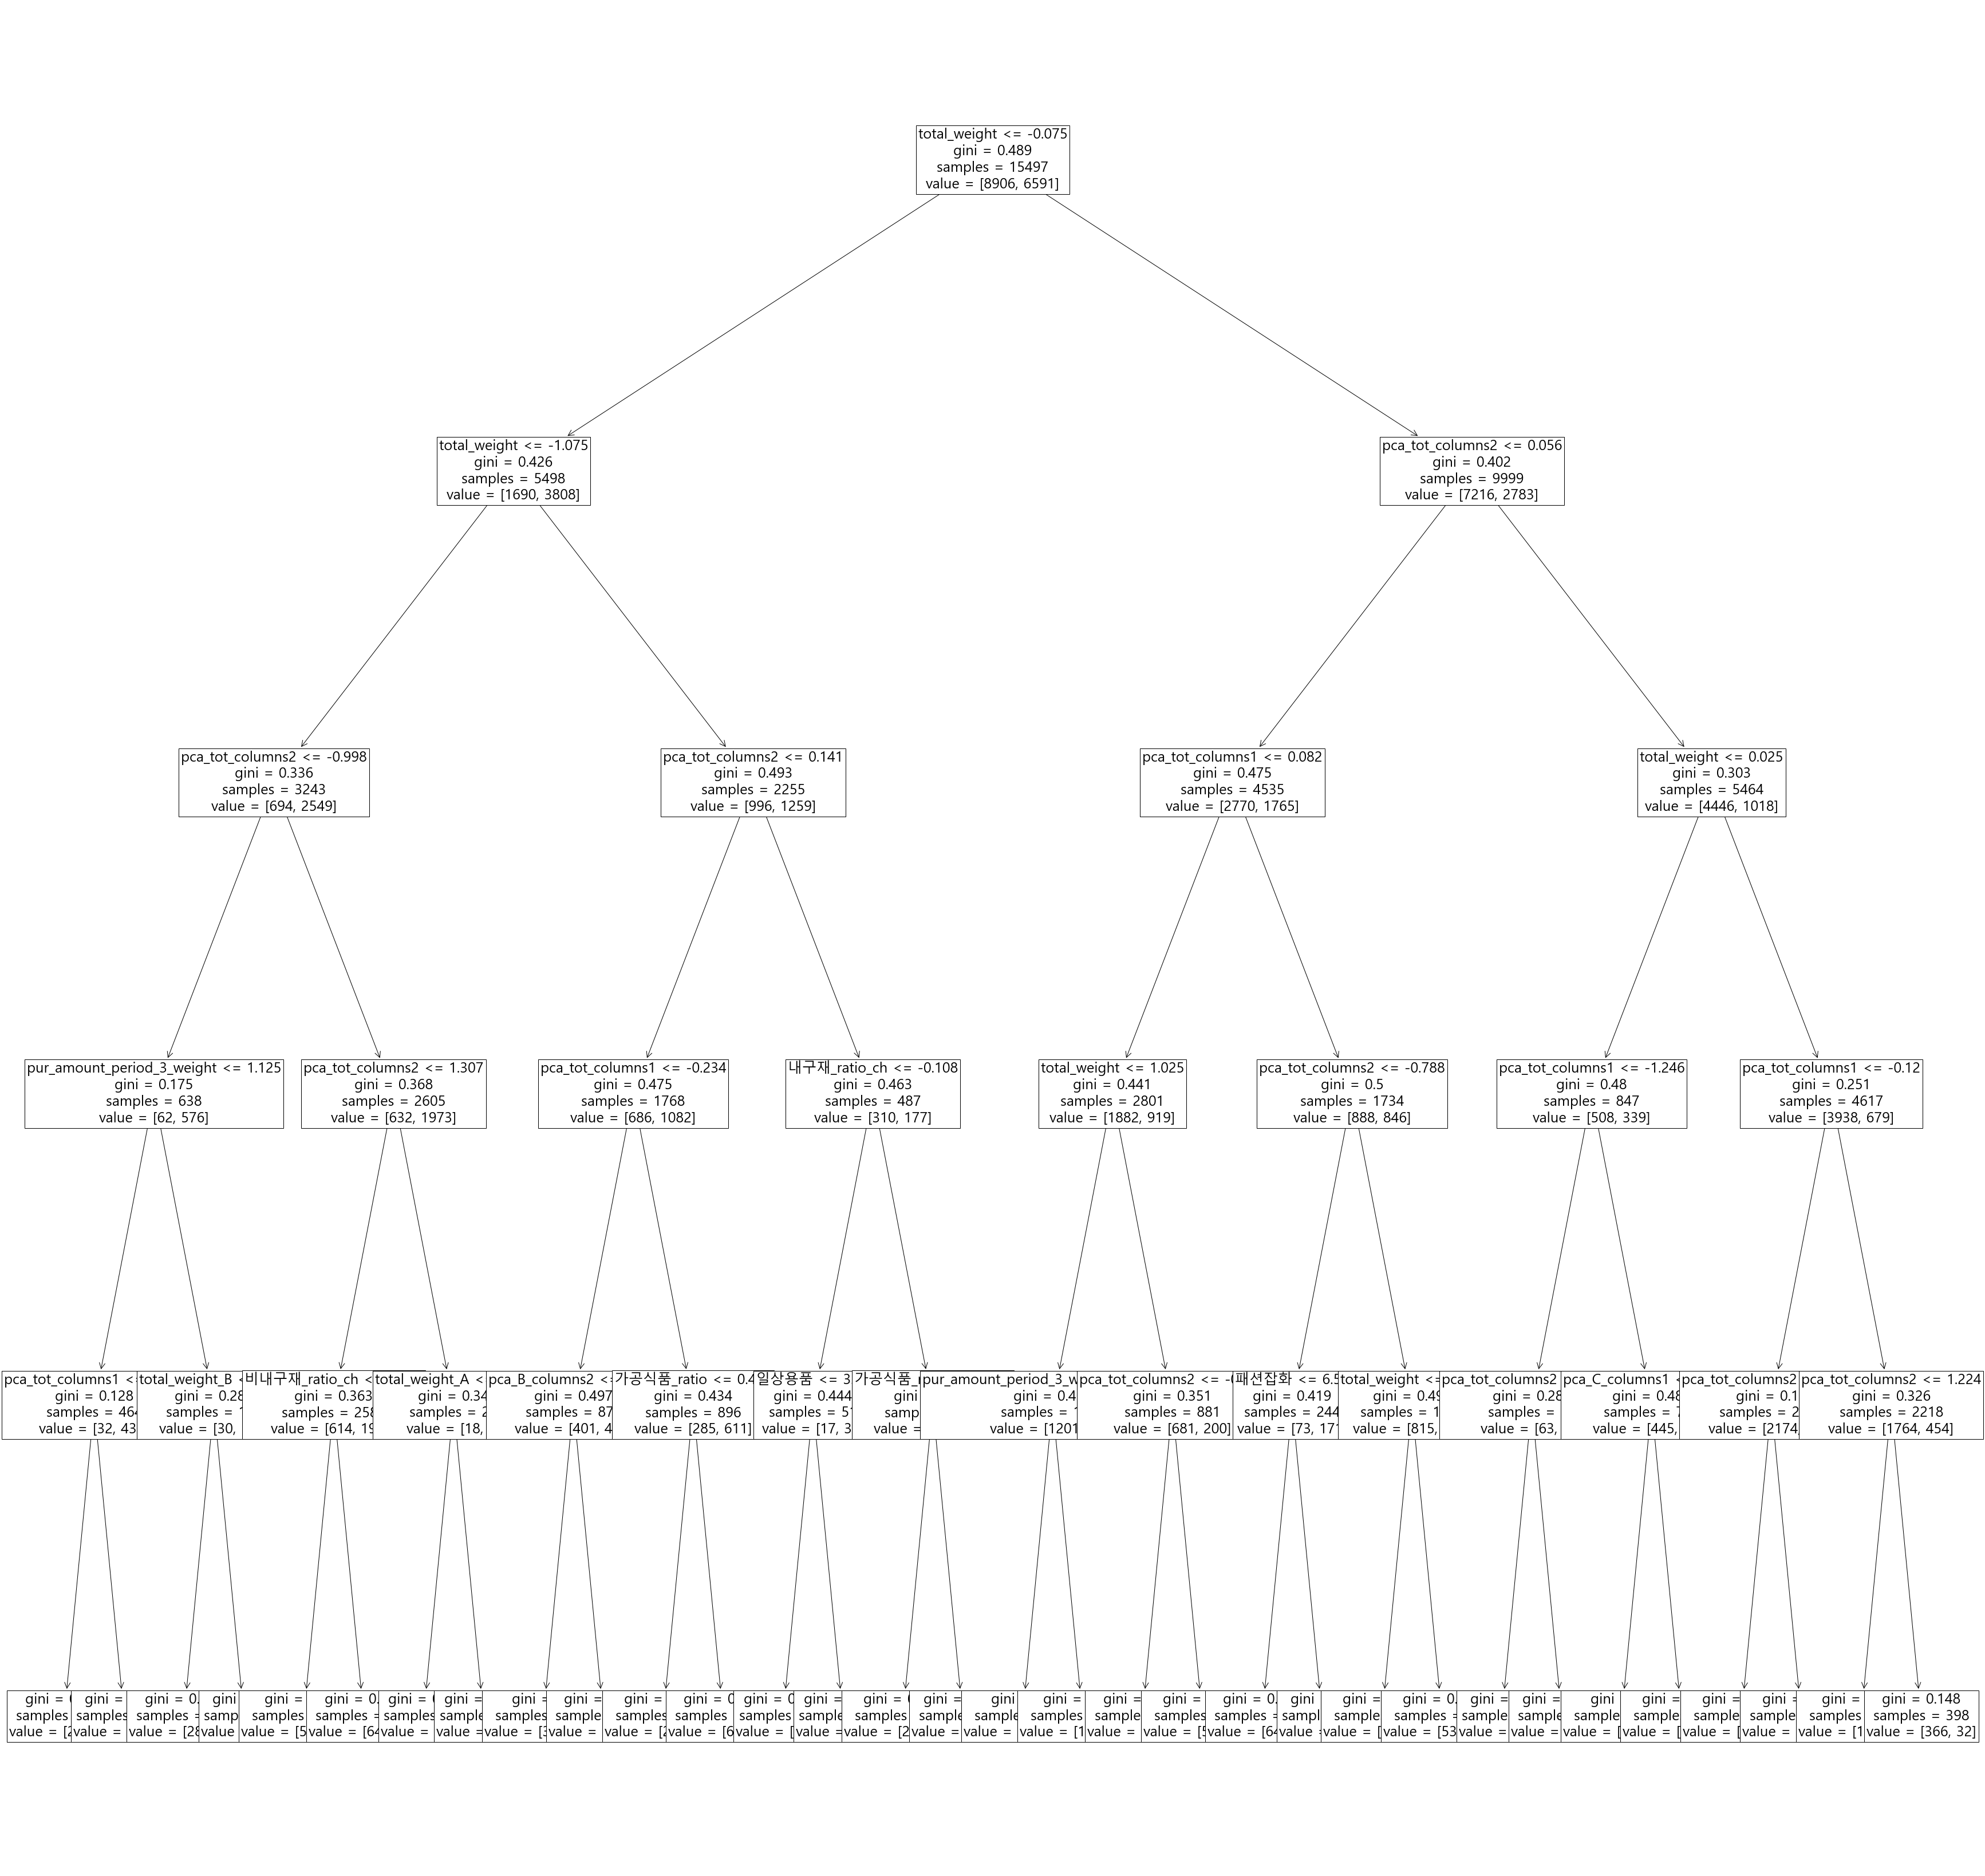

In [73]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(60,60))

plot_tree(dt, feature_names=X_train1.columns, fontsize=25)

In [71]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train1, y_train1)
acc5= lr.predict(X_test1)

print (accuracy_score(y_test1, acc5))

0.7329032258064516


C:\Users\han71\anaconda3\envs\cakd3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
